In [2]:
# do this in your bash terminal (without the "!")
!pip install python-mnist

  Running setup.py bdist_wheel for python-mnist ... done
  Stored in directory: /Users/leey/Library/Caches/pip/wheels/ba/c1/d1/6a69b643fd584fbd83eb5103deeb4e67bb89a86db6afeffe6a
Successfully built python-mnist


In [3]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,8)

In [4]:
# decompress the data
import gzip
filenames = 'train-images-idx3-ubyte t10k-images-idx3-ubyte train-labels-idx1-ubyte t10k-labels-idx1-ubyte'.split()

for i, filename in enumerate(filenames):
    pathin = '../shared-resources/mnist/' + filename + '.gz'
    pathout = pathin[:-3]
    with gzip.open(pathin) as fin:
        print("Reading file #{}: {}".format(i, pathin))
        with open('../shared-resources/mnist/' + filename, 'wb') as fout:
            print("Writing file #{}: {}".format(i, pathout))
            fout.write(fin.read())

Reading file #0: ../shared-resources/mnist/train-images-idx3-ubyte.gz
Writing file #0: ../shared-resources/mnist/train-images-idx3-ubyte
Reading file #1: ../shared-resources/mnist/t10k-images-idx3-ubyte.gz
Writing file #1: ../shared-resources/mnist/t10k-images-idx3-ubyte
Reading file #2: ../shared-resources/mnist/train-labels-idx1-ubyte.gz
Writing file #2: ../shared-resources/mnist/train-labels-idx1-ubyte
Reading file #3: ../shared-resources/mnist/t10k-labels-idx1-ubyte.gz
Writing file #3: ../shared-resources/mnist/t10k-labels-idx1-ubyte


In [5]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [6]:
from mnist import MNIST

mnistdb = MNIST('../shared-resources/mnist/')

training_images, training_labels = mnistdb.load_training()
test_images, test_labels = mnistdb.load_testing()

In [7]:
df_train = pd.DataFrame(list(zip(training_images, training_labels)), columns=['image', 'label'])
df_test = pd.DataFrame(list(zip(test_images, test_labels)), columns=['image', 'label'])

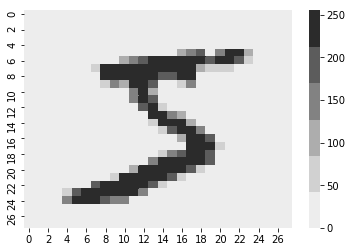

In [9]:
cmap = sns.palettes.color_palette('Greys')
ax = sns.heatmap(pd.np.array(df_train.image[0]).reshape(28, 28), cmap=cmap)

In [13]:
df_train_image = pd.DataFrame(list(df_train.image.values))
df_train_image.head(5)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
from sklearn.decomposition import PCA
n_components = 15
pca = PCA(n_components=15).fit(df_train_image)
df_pca15 = pca.transform(df_train_image)

In [108]:
df_pca15 = pd.DataFrame(df_pca15)
df_pca15.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,123.932588,-312.674276,-24.514017,-555.757989,-27.296962,-232.475292,233.992338,159.823396,-363.528510,198.399124,197.650633,-253.826751,-110.051547,748.787850,220.364184
1,1011.718376,-294.857038,596.339570,-460.766204,-827.275326,-181.950305,-45.022248,-104.961055,40.456044,150.955021,-286.487639,-107.335753,-318.957491,91.538716,-237.678779
2,-51.849608,392.173171,-188.509786,521.011397,-306.680528,-1.836258,-859.045944,368.570522,-114.539313,-178.483053,450.420998,-159.162153,184.800596,109.513748,-145.425553
3,-799.127036,-607.197218,273.651239,105.878240,-1.853176,699.654682,-473.712925,-67.321223,302.728613,11.108055,-432.411774,-175.038645,244.258552,165.324012,-151.642618
4,-382.754942,730.542892,16.353712,-241.697476,98.161419,43.228675,-91.666277,-405.577641,225.519109,104.143126,-348.176515,459.301309,-259.171143,-313.081124,59.190636


In [109]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(df_pca15)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [117]:
df_pca15['cluster_id'] = kmeans.predict(df_pca15.values[:,:n_components])
df_pca15['digit_id'] = df_train.label
df_pca15.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cluster_id,digit_id,predicted_digit,lr_predicted_digit
0,123.932588,-312.674276,-24.514017,-555.757989,-27.296962,-232.475292,233.992338,159.823396,-363.528510,198.399124,197.650633,-253.826751,-110.051547,748.787850,220.364184,3,5,8,3
1,1011.718376,-294.857038,596.339570,-460.766204,-827.275326,-181.950305,-45.022248,-104.961055,40.456044,150.955021,-286.487639,-107.335753,-318.957491,91.538716,-237.678779,9,0,5,0
2,-51.849608,392.173171,-188.509786,521.011397,-306.680528,-1.836258,-859.045944,368.570522,-114.539313,-178.483053,450.420998,-159.162153,184.800596,109.513748,-145.425553,2,4,4,4
3,-799.127036,-607.197218,273.651239,105.878240,-1.853176,699.654682,-473.712925,-67.321223,302.728613,11.108055,-432.411774,-175.038645,244.258552,165.324012,-151.642618,4,1,9,1
4,-382.754942,730.542892,16.353712,-241.697476,98.161419,43.228675,-91.666277,-405.577641,225.519109,104.143126,-348.176515,459.301309,-259.171143,-313.081124,59.190636,0,9,7,9


In [118]:
digit2cluster = []
for digit in range(10):
    votes = df_pca15.cluster_id[df_pca15.digit_id == digit].value_counts()
#     print()
#     print(votes)
#     print()
    i = 0
    cluster_id = votes.index[i]
    while cluster_id in digit2cluster:
        cluster_id = votes.index[i]
        i += 1
    digit2cluster.append(cluster_id)

In [119]:
digit2cluster

[6, 5, 8, 1, 2, 9, 7, 0, 3, 4]

In [120]:
df_pca15['predicted_digit'] = [digit2cluster.index(cid) for cid in df_pca15.cluster_id]

In [121]:
accuracy = (df_pca15.predicted_digit == df_pca15.digit_id).sum() / len(df_pca15)
accuracy

0.51231666666666664

In [122]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')
lr.fit(df_pca15.values[:,:n_components], df_pca15.digit_id)
df_pca15['lr_predicted_digit'] = lr.predict(df_pca15.values[:,:n_components])

In [123]:
lr.score(df_pca15.values[:,:n_components], df_pca15.digit_id)

0.81796666666666662

In [124]:
(df_pca15.lr_predicted_digit == df_pca15.digit_id).sum() / len(df_pca15)

0.81796666666666662